In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [284]:
historical_index=pd.read_csv('historical_index2.csv')
gender_inequality=pd.read_csv('gender_inequality.csv')
genderin=gender_inequality
genderin = genderin.replace(to_replace = '..', value = '0.1')
gender_inequality = gender_inequality[gender_inequality['Gender Inequality Index (GII)'] != ".."]
gender_development=pd.read_csv('gender_development.csv')
gender_development = gender_development[gender_development['Gender Development Index (GDI)'] != ".."]
human_development=pd.read_csv('human_development.csv')
# historical_index = historical_index.replace(to_replace = '..', value = None)
# historical_index.dropna(axis=0, how='all')
# historical_index=historical_index[historical_index.columns[2::2]]
# historical_index.head()
historical_index.columns=["HDI Rank", "Country", "1990", "2000", "2010", "2011", "2012", "2013", "2014"]
tenyr=historical_index.drop(['2011', '2012','2013','2014'], axis=1)
tenyr= tenyr[tenyr['1990'] != ".."]
oneyr=historical_index.drop(['1990','2000'],axis=1)

In [283]:
#import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.offline as py
import plotly.graph_objects as go
#conda install plotly

data = [dict(
        type='choropleth',
        locations= genderin.Country,
        locationmode='country names',
        z=genderin['Gender Inequality Index (GII)'],
        text=gender_inequality.Country,
        colorscale = 'Blues',
        reversescale=True,
        colorbar=dict(autotick=False, tickprefix='', title='GII'),
)]
layout = dict(
            title = 'Gender Inequality',
            geo = dict(
            showframe = False, 
            showcoastlines = True, 
            projection = dict(type = 'Mercator')),
            margin = dict(t=30, b=30, l=10, r=10))
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)



/Users/asadrizvi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



[]

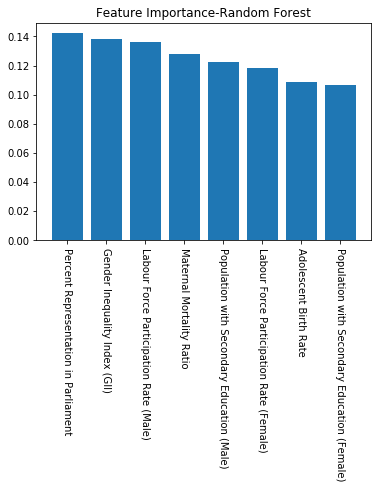

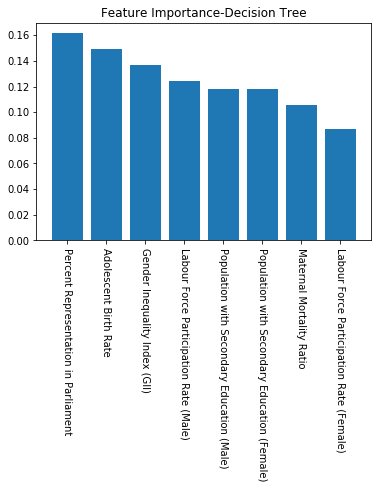

In [247]:
#Random Forest Classifier
X=gender_inequality.drop(['GII Rank','Country'], axis=1)
y=countries=gender_inequality['Country']
clf = RandomForestClassifier(random_state=0, n_jobs=-1)
model = clf.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance-Random Forest")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=270)
plt.plot()

#Decision Tree Classifier
clf=DecisionTreeClassifier(criterion='gini',random_state=None,presort=False)
model = clf.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance-Decision Tree")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=270)
plt.plot()

                                          Specs         Score
1                      Maternal Mortality Ratio  47005.107200
2                         Adolescent Birth Rate   5610.253675
4  Population with Secondary Education (Female)   2724.962961
5    Population with Secondary Education (Male)   2040.357489
3          Percent Representation in Parliament    978.727624
6      Labour Force Participation Rate (Female)    790.478994
7        Labour Force Participation Rate (Male)    150.838829
0                 Gender Inequality Index (GII)     15.590354
[0.12795031 0.1136646  0.12608696 0.1242236  0.12111801 0.12173913
 0.13167702 0.13354037]


/Users/asadrizvi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



[]

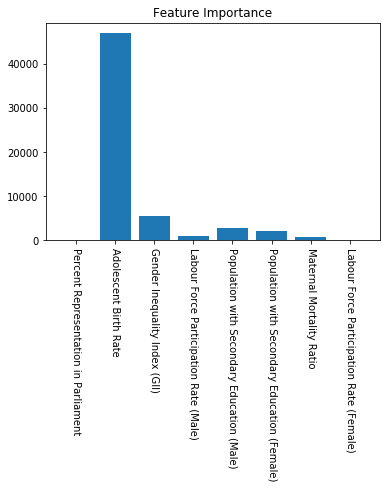

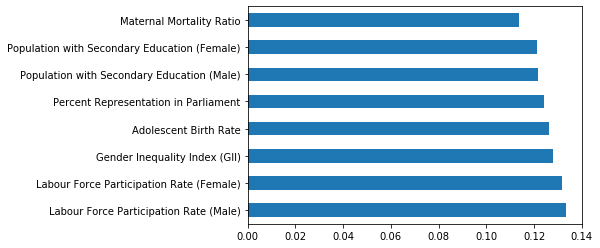

In [248]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))
plt.figure()
#plt.subplot(1,2,1)
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), featureScores['Score'])
plt.xticks(range(X.shape[1]), names, rotation=270)
plt.plot()


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
#plt.subplot(1,2,2)
plt.figure()
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.plot(rotation=180)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
Gender Inequality Index (GII)                   195 non-null float64
Maternal Mortality Ratio                        195 non-null float64
Adolescent Birth Rate                           195 non-null float64
Percent Representation in Parliament            195 non-null float64
Population with Secondary Education (Female)    195 non-null float64
Population with Secondary Education (Male)      195 non-null float64
Labour Force Participation Rate (Female)        195 non-null float64
Labour Force Participation Rate (Male)          195 non-null float64
dtypes: float64(8)
memory usage: 12.3 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 10 columns):
GII Rank                                        188 non-null float64
Country                                         195 non-null object
Gender Inequality Index (GII)                   195 non-nul

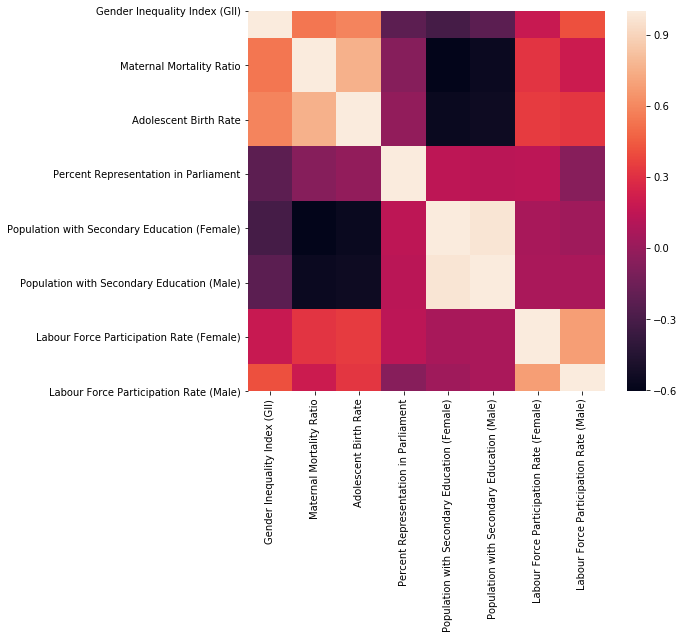

In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
X=genderin.drop(['Country','GII Rank'], axis=1)
X = X.astype(float)
X.info()

print('\n')
genderin.info()
plt.figure(figsize=(8,7))
sns.heatmap(X.corr())
#plot heat map
#g=sns.heatmap(genderin.corr(),annot=True,cmap="RdYlGn")

In [281]:
df=pd.read_csv('2018_Gender_ineq.csv')
df=df.drop(['Unnamed: 7','Unnamed: 5','Unnamed: 3','Unnamed: 7','Unnamed: 9','Unnamed: 11','Unnamed: 13','Unnamed: 15','Unnamed: 17','Unnamed: 19'],axis=1)
df=df.drop([0,1,2,3,4,5,6,160,66],axis=0)
df.columns=["HDI Rank", "Country", "GII", "Rank", "Maternal Mortality Ratio", "Adolescent Birth Rate","Share of Seats In Parliment", "Male Population With Secondary Education","Female Population With Secondary Education", "Male Labor Force Participation","Female Labor Force Participation"]
df.dropna(axis=0, how='all')
df.dropna(axis=1, how='all')
df= df[df['GII'] != ".."]
df.to_csv()
genderinnew=df
#df.iloc[0,0:3]
genderinnew.head()

,HDI Rank,Country,GII,Rank,Maternal Mortality Ratio,Adolescent Birth Rate,Share of Seats In Parliment,Male Population With Secondary Education,Female Population With Secondary Education,Male Labor Force Participation,Female Labor Force Participation
7,1,Norway,0.048,5,5,5.6,41.4,96.3,95.1,60.8,67.6
8,2,Switzerland,0.039,1,5,3.0,29.3,96.4,97.2,62.9,74.1
9,3,Australia,0.109,23,6,12.9,32.7,90.0,89.9,59.2,70.5
10,4,Ireland,0.109,23,8,9.7,24.3,90.2,86.3,53.0,67.3
11,5,Germany,0.072,14,6,6.5,31.5,96.2,96.8,55.0,66.2


In [279]:
m_cols=["GDI Rank","Country",""]
df=pd.read_csv('Gender_Inequality_Index.csv')
df.head()

,Gender Inequality Index (GII),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,HDI Rank (2017),Country,1995,NaN,2000,NaN,2005,NaN,2010,NaN,...,2013,NaN,2014,NaN,2015,NaN,2016,NaN,2017,NaN
1,168,Afghanistan,..,..,..,..,0.742,..,0.728,..,...,0.694,..,0.682,..,0.672,..,0.66,..,0.653,..
2,68,Albania,..,..,0.38,..,0.329,..,0.273,..,...,0.267,..,0.261,..,0.256,..,0.25,..,0.238,..
3,85,Algeria,0.679,a,0.627,..,0.561,..,0.528,..,...,0.432,..,0.437,..,0.437,..,0.432,..,0.442,..
4,47,Argentina,0.419,a,0.411,..,0.372,..,0.374,..,...,0.365,..,0.365,..,..,..,0.361,..,0.358,..
